<h1><center><font size=8>AIML - Project 3 - Personal Loan Campaign</center></font></h1>
<center><img src="https://s3.ap-southeast-1.amazonaws.com/images.deccanchronicle.com/dc-Cover-guh76c5ok88sgj80gglmkob1k4-20181015015330.Medi.jpeg" width="600" height="300"></center>

# Context:

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.


# Objective:

* To predict whether a liability customer will buy a personal loan or not.
* Which variables are most significant.
* Which segment of customers should be targeted more.


# Dataset

* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Average spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?

### **Importing the necessary libraries**

In [52]:
#---------------------------------------------Importing Required Libraries-----------------------------------
%matplotlib inline

import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeClassifier

# import numpy as np
# import pandas as pd
import seaborn as sns

sns.set(color_codes=True)

from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split #--------------splitting data into test and train

# To build model for prediction
from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix,precision_recall_curve,roc_curve,roc_auc_score #-----model validation scores
%matplotlib inline

from IPython.display import display #---------------------for displaying multiple data frames in one output

import missingno as msno_plot #--------------plotting missing values

In [3]:
import warnings
warnings.filterwarnings('ignore')

## **Loading the dataset**

In [4]:
#Mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
loanModelling = pd.read_csv('/content/drive/My Drive/Python Learning/Projects/Project3/Loan_Modelling.csv')

In [6]:
# copying data to another varaible to avoid any changes to original data
data=loanModelling.copy()

# Checking 10 random values from data set
np.random.seed(1)
data.sample(n=10)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
2764,2765,31,5,84,91320,1,2.9,3,105,0,0,0,0,1
4767,4768,35,9,45,90639,3,0.9,1,101,0,1,0,0,0
3814,3815,34,9,35,94304,3,1.3,1,0,0,0,0,0,0
3499,3500,49,23,114,94550,1,0.3,1,286,0,0,0,1,0
2735,2736,36,12,70,92131,3,2.6,2,165,0,0,0,1,0
3922,3923,31,4,20,95616,4,1.5,2,0,0,0,0,1,0
2701,2702,50,26,55,94305,1,1.6,2,0,0,0,0,1,0
1179,1180,36,11,98,90291,3,1.2,3,0,0,1,0,0,1
932,933,51,27,112,94720,3,1.8,2,0,0,1,1,1,1
792,793,41,16,98,93117,1,4.0,3,0,0,0,0,0,1


## **Exploratory Data Analysis(EDA)**


#### **Understanding the structure of the data**

In [7]:
# checking the shape of the data
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")  # f-string

There are 5000 rows and 14 columns.


In [8]:
# checking for duplicates in data
data[data.duplicated()].count()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

* There are no duplicates available in this dataset.

In [9]:
# checking data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB




- All the data is in numeric format(including booleans like Personal_Loan, Securities_Account,CD_Account,Online,CreditCard).
- The `ID` Column may not be required and can be dropped from dataset.



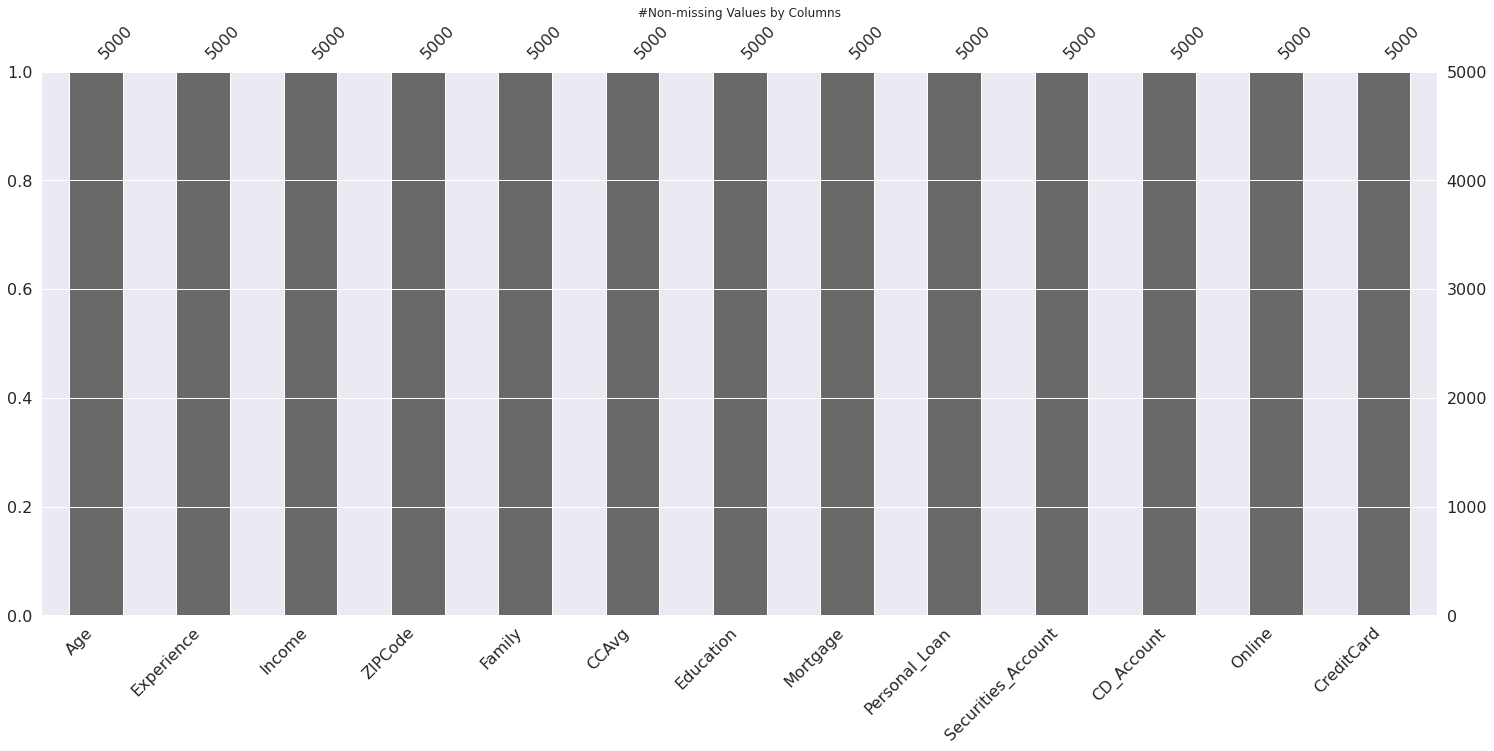

In [31]:
#-------------------------------------------Barplot of non-missing values--------------------------------
plt.title('#Non-missing Values by Columns')
msno_plot.bar(data);

In [11]:
# Perform statistical analysis on data
data.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.50,1443.52,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.34,11.46,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.10,11.47,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.77,46.03,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.26,1759.46,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.40,1.15,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.94,1.75,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.88,0.84,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.50,101.71,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.10,0.29,0.0,0.00,0.0,0.00,1.0


1. Personal_Loan, Securities_Account,CD_Account,Online,CreditCard are binaries based on min and max values. 

2. Income, CCAvg, Mortgage seems to be right skewed.

#### **Univariant Analysis**

In [12]:
# Defining the function for creating boxplot and hisogram 
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
   
    
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize)  # creating the 2 subplots
    
    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color="pink")  # boxplot will be created and a star will indicate the mean value of the colum
   
    if bins:
      sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, color="lightgreen")
    else: 
      sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, color="lightblue")  # For histogram
    
    ax_hist2.axvline(data[feature].mean(), color="red", linestyle="--")  # Add mean to the histogram
    ax_hist2.text(data[feature].mean()+0.15,30,'Mean = '+str(round(data[feature].mean(),1)),rotation=90, fontsize=10)
    
    ax_hist2.axvline(data[feature].median(), color="green", linestyle="-")  # Add median to the histogram
    ax_hist2.text(data[feature].median()+0.15,30,'Median = '+str(round(data[feature].median(),1)),rotation=90, fontsize=10)

In [13]:
non_boolean_cols = ['Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage']

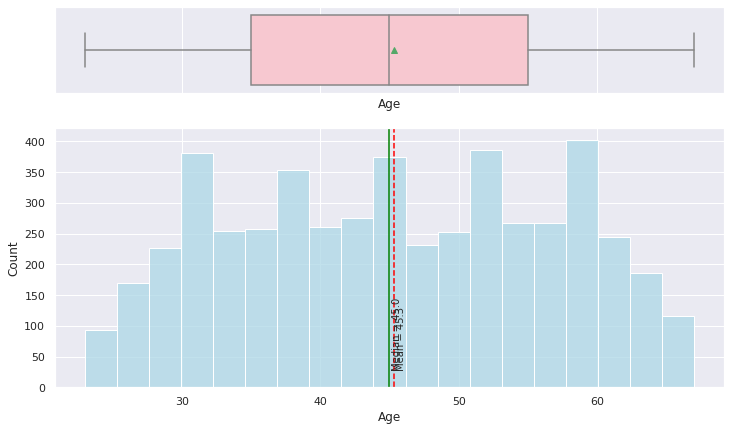

In [14]:
# Observations on Age for demographic
histogram_boxplot(data,'Age')

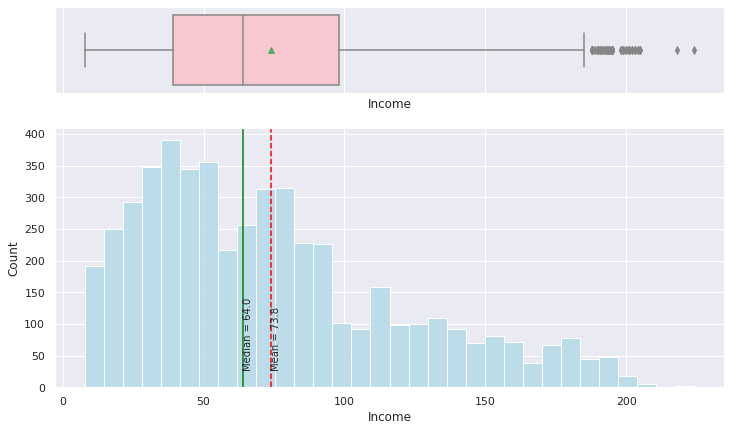

In [15]:
# Observations on Income
histogram_boxplot(data,'Income')

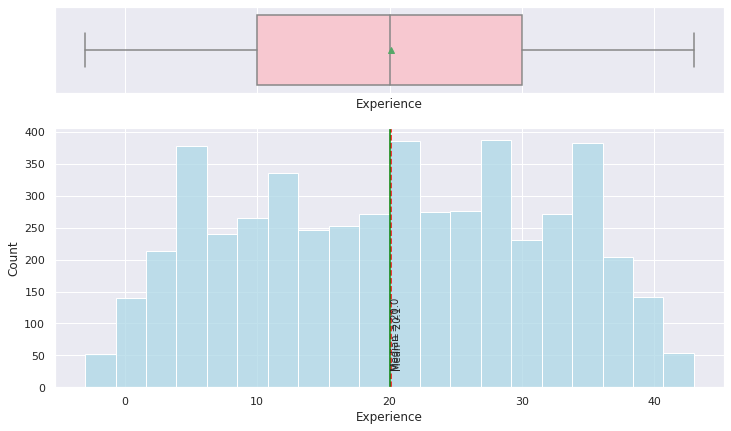

In [16]:
# Observations on Experience
histogram_boxplot(data,'Experience')

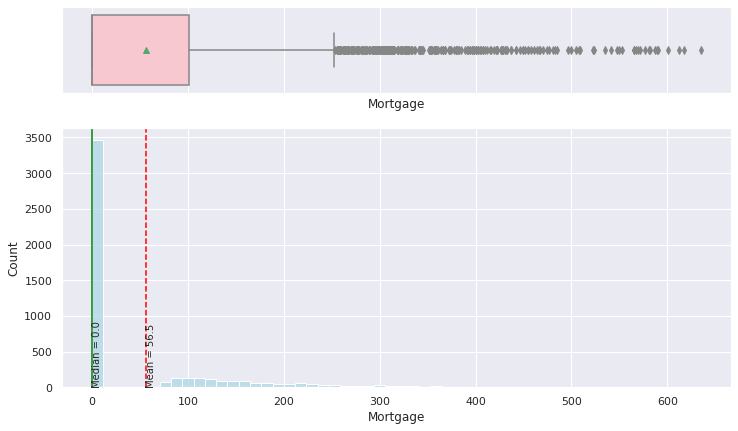

In [17]:
# Observations on Mortgage
histogram_boxplot(data,'Mortgage')

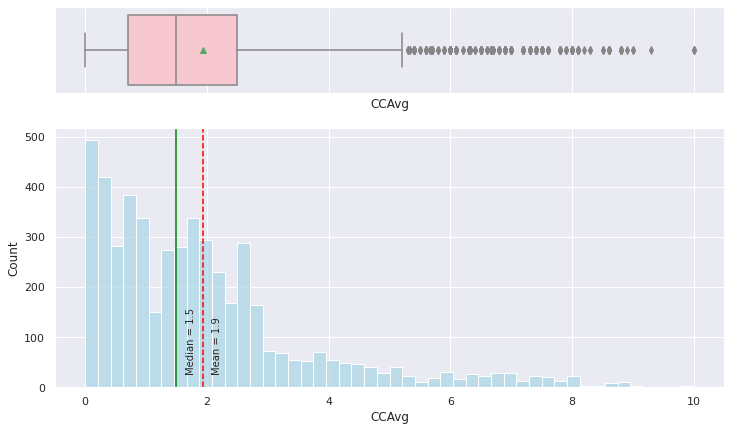

In [18]:
# Observations on CCAvg
histogram_boxplot(data,'CCAvg')

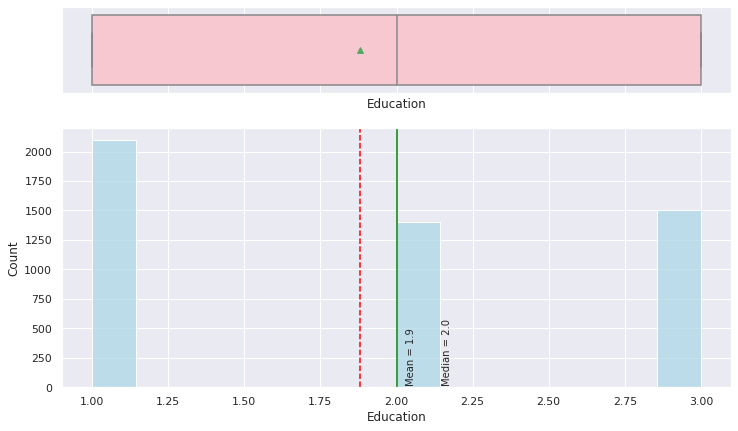

In [19]:
# Observations on Education
histogram_boxplot(data,'Education')

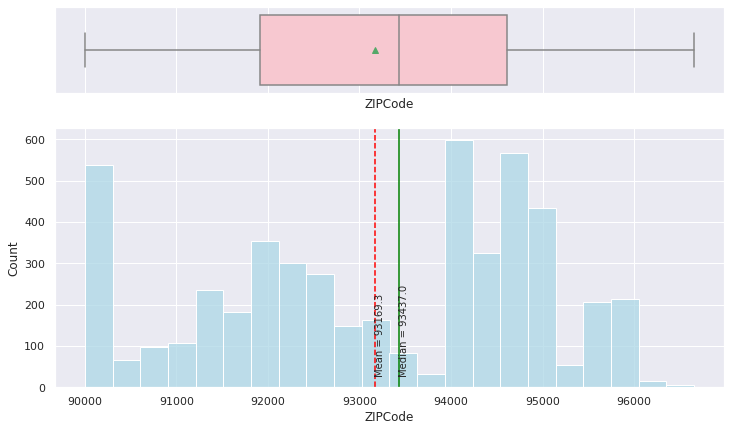

In [20]:
# Observations on ZIPCode
histogram_boxplot(data,'ZIPCode')

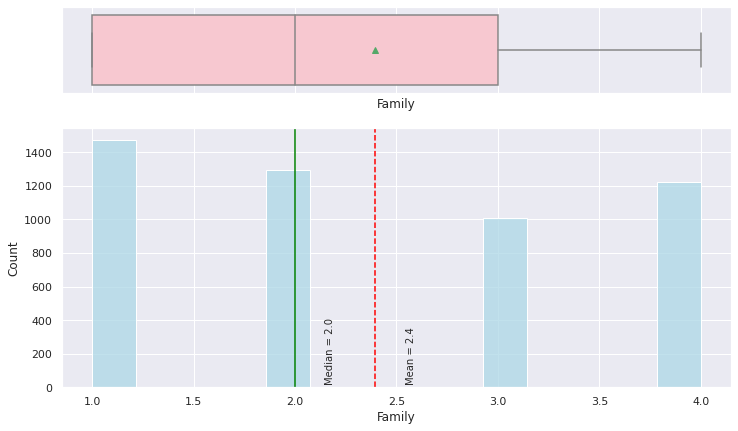

In [21]:
# Observations on Family
histogram_boxplot(data,'Family')

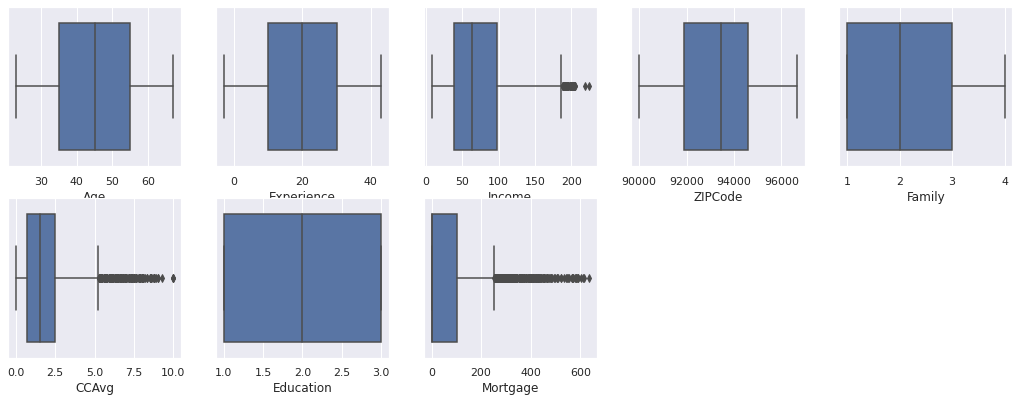

In [22]:
#--Checking Outliers for non boolean columns
#-----------------------------Plot Outliers using Box plot for non boolean columns------------------------------------
plt.figure(figsize=(18,10))
pos = 1
for i in non_boolean_cols:
    plt.subplot(3, 5, pos)
    sns.boxplot(data[i])
    pos += 1 

- Income, CCAvg and Mortgage shows outliers.

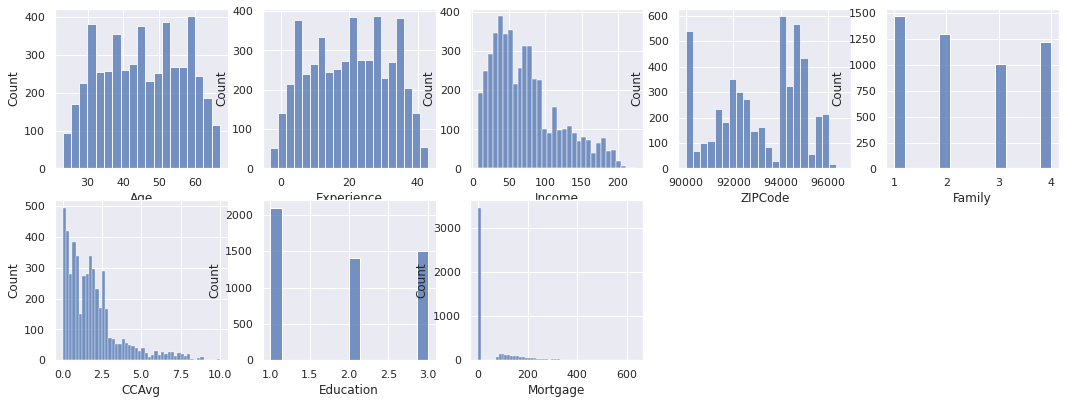

In [23]:
#-----------------------------Check Distribution using histplot for non boolean columns------------------------------------
plt.figure(figsize=(18,10))
pos = 1
for i in non_boolean_cols:
    plt.subplot(3, 5, pos)
    sns.histplot(data[i])
    pos += 1 

- Income, CCAvg and Mortgage having outliers are also right skewed.
- Age and Experience seems to be normally disttributed.

#### **Multivariate Data Analysis**
* Analysis of interaction between features, in the dataset.

In [24]:
print(data.columns)

corr_cols = ['Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard']

Index(['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')


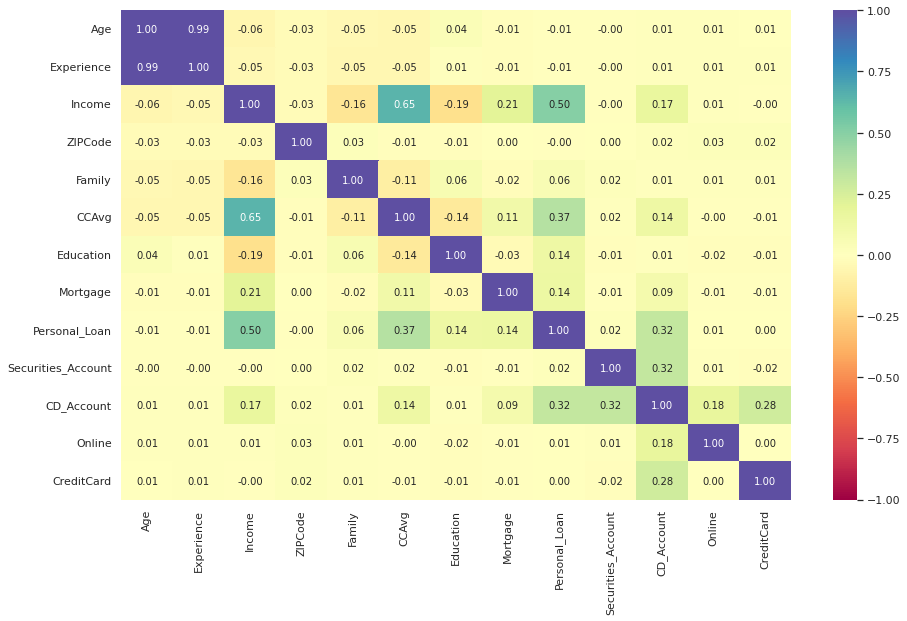

In [25]:
plt.figure(figsize=(15, 9))
sns.heatmap(
    data[corr_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

1. High correlation between
      - Age and Experience
      - Income with CCAvg and Personal Loan 
2. Availability of CD_Account has good corrleation/chances if having Securities Account and Availing Personal Loan from last campaign.

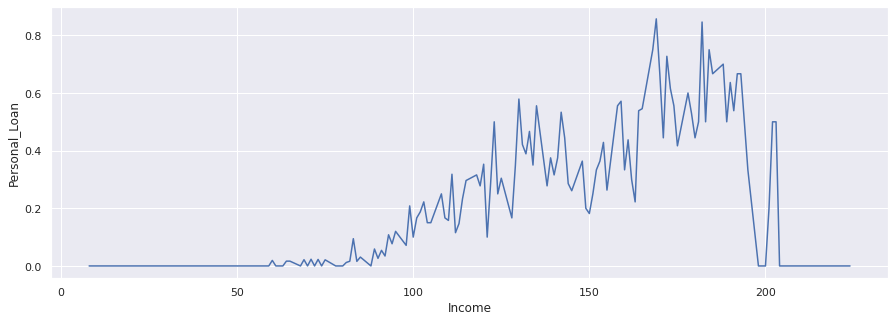

In [27]:
# Check relation between Income and Personal Loan
plt.figure(figsize=(15,5))
sns.lineplot(data=data,x='Income',y='Personal_Loan',ci=None)
plt.show()

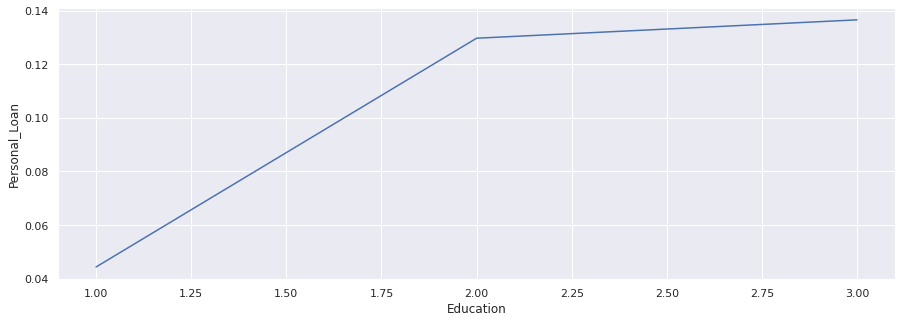

In [26]:
# Check relation between Education and Personal Loan
plt.figure(figsize=(15,5))
sns.lineplot(data=data,x='Education',y='Personal_Loan',ci=None)
plt.show()

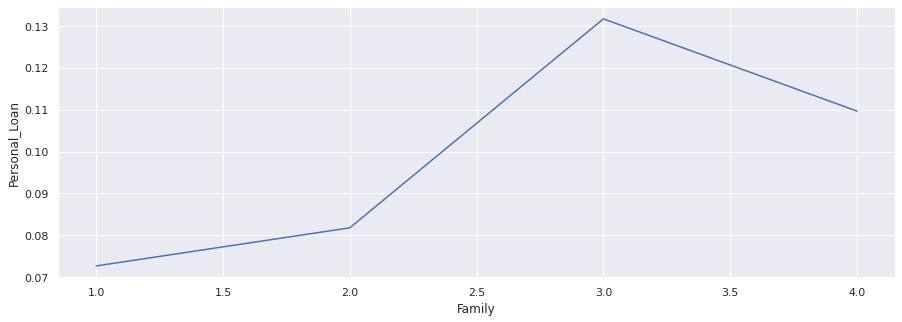

In [28]:
# Check relation between Family size and Personal Loan
plt.figure(figsize=(15,5))
sns.lineplot(data=data,x='Family',y='Personal_Loan',ci=None)
plt.show()

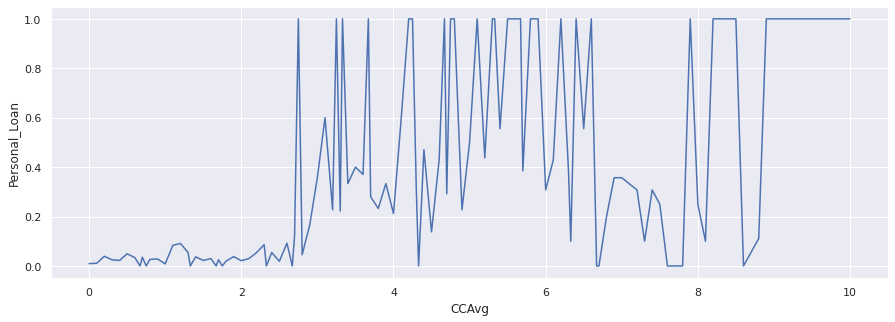

In [29]:
# Check relation between Credit Card Average spending and Personal Loan
plt.figure(figsize=(15,5))
sns.lineplot(data=data,x='CCAvg',y='Personal_Loan',ci=None)
plt.show()

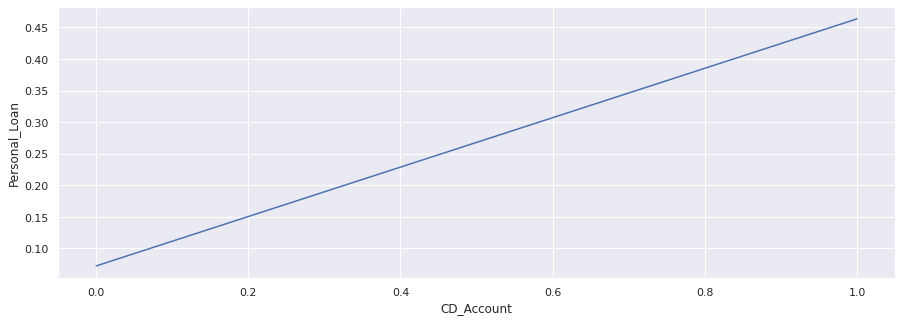

In [30]:
# Check relation between CS Account and Personal Loan
plt.figure(figsize=(15,5))
sns.lineplot(data=data,x='CD_Account',y='Personal_Loan',ci=None)
plt.show()

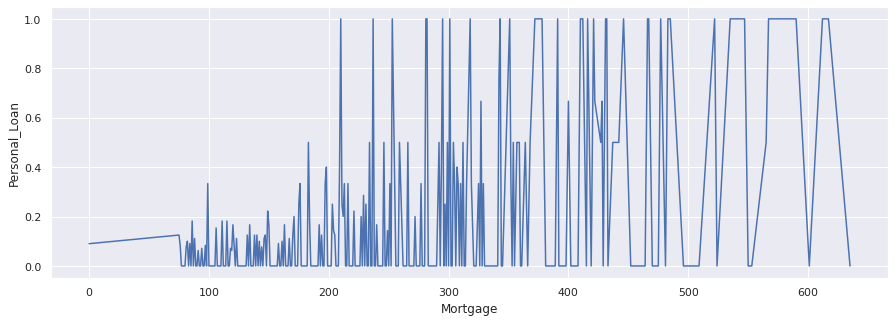

In [31]:
# Check relation between Mortage and Personal Loan
plt.figure(figsize=(15,5))
sns.lineplot(data=data,x='Mortgage',y='Personal_Loan',ci=None)
plt.show()

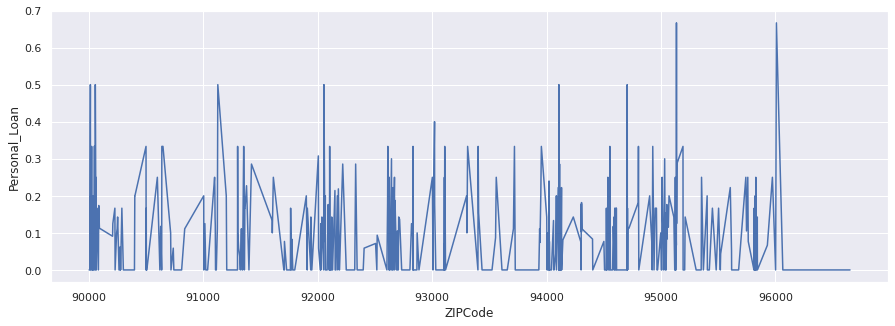

In [32]:
plt.figure(figsize=(15,5))
sns.lineplot(data=data,x='ZIPCode',y='Personal_Loan',ci=None)
plt.show()

#### Analyzing dependent variable - Personal_Loan

In [34]:
result=data.groupby(['Personal_Loan']).mean().T
result.rename(columns={0:"Not_Opted_For_Loan", 1:"Opted_For_Loan"}, inplace=True)
result["Delta"]=(result["Opted_For_Loan"]/result["Not_Opted_For_Loan"]-1)*100
result.round(2)

Personal_Loan,Not_Opted_For_Loan,Opted_For_Loan,Delta
ID,2512.17,2390.65,-4.84
Age,45.37,45.07,-0.66
Experience,20.13,19.84,-1.43
Income,66.24,144.75,118.53
ZIPCode,93170.96,93153.20,-0.02
Family,2.37,2.61,10.07
CCAvg,1.73,3.91,125.87
Education,1.84,2.23,21.14
Mortgage,51.79,100.85,94.72
Securities_Account,0.10,0.12,22.29


- Income, CCAvg and Mortgage data elements have good influence on deciding if the individual have availed Person Loan.

In [35]:
data['Personal_Loan'].value_counts(normalize=True)

0    0.904
1    0.096
Name: Personal_Loan, dtype: float64

- We have Imbalance training data in data set. (More data where individuals has not opted for Personal Loan - 90%). Fair weighted training data can help analyzing data better and come up with better recommendations. 

#### <a id='link1'>Summary of EDA</a>
**Observations from EDA:**

- `Personal Loan`: Personal Loan has high positive correlation Income and CCAvg indicating that people with higher income and CC spending tend to avail personal loan .
- Individuals with CD Account also seems positive availing Personal Loan
- Based on available data for Personal Loan column, there seems to be data impbalance which may impact overall analysis. 90% of data is for individuals not availing loan.
- `ZIPCode`: ZipCode doesn't seems to be big driver for deciding Personal Loan. 95000 and 96000 zip codes have few better prospects who availabled Personal Loan.

## **Data Preprocessing**

In [36]:
# ID column is not required for analysis. These columns doesn't influence target variable - Personal_Loan.
data.drop(['ID'],axis=1,inplace=True) 

In [37]:
#Transforming to log for normal distribution
data["Income_log"] = np.log(data["Income"])

In [38]:
#Transforming to log for normal distribution
data["CCAvg_log"] = np.log(data["CCAvg"])

In [39]:
# Checking 10 random values from data set
np.random.seed(1)
data.sample(n=10)

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Income_log,CCAvg_log
2764,31,5,84,91320,1,2.9,3,105,0,0,0,0,1,4.430817,1.064711
4767,35,9,45,90639,3,0.9,1,101,0,1,0,0,0,3.806662,-0.105361
3814,34,9,35,94304,3,1.3,1,0,0,0,0,0,0,3.555348,0.262364
3499,49,23,114,94550,1,0.3,1,286,0,0,0,1,0,4.736198,-1.203973
2735,36,12,70,92131,3,2.6,2,165,0,0,0,1,0,4.248495,0.955511
3922,31,4,20,95616,4,1.5,2,0,0,0,0,1,0,2.995732,0.405465
2701,50,26,55,94305,1,1.6,2,0,0,0,0,1,0,4.007333,0.470004
1179,36,11,98,90291,3,1.2,3,0,0,1,0,0,1,4.584967,0.182322
932,51,27,112,94720,3,1.8,2,0,0,1,1,1,1,4.718499,0.587787
792,41,16,98,93117,1,4.0,3,0,0,0,0,0,1,4.584967,1.386294


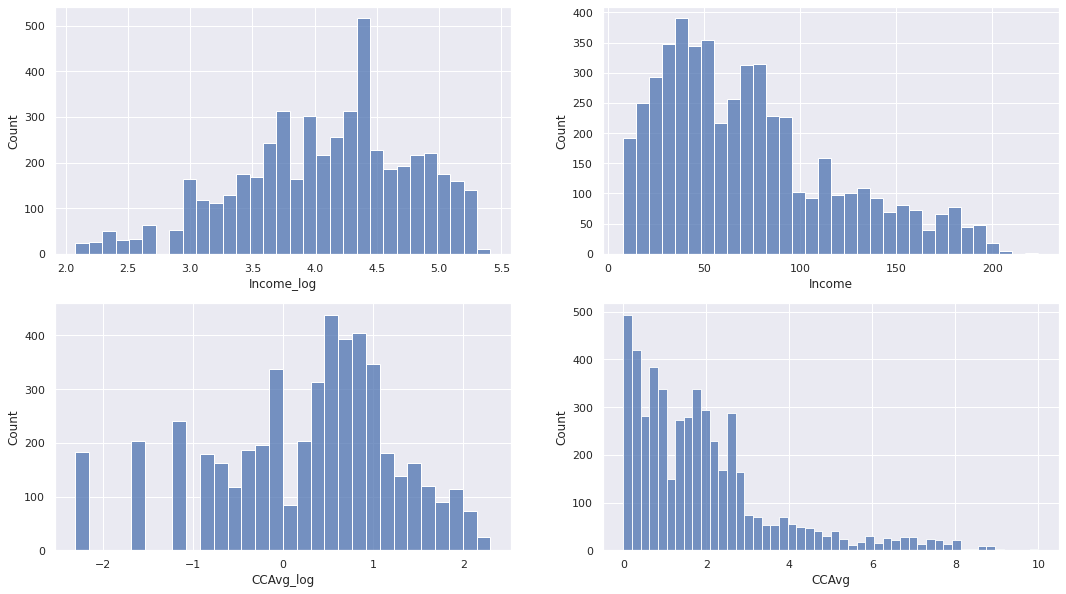

In [40]:
#-----------------------------Check Distribution using histplot After Log Transformation ------------------------------------
log_transformed_columns= ['Income_log', 'Income', 'CCAvg_log', 'CCAvg',]
plt.figure(figsize=(18,10))
pos = 1
for i in log_transformed_columns:
    plt.subplot(2, 2, pos)
    sns.histplot(data[i])
    pos += 1 

#### Checking for Linear Decision Boundaries
Using correlation, hypothesis, and box plot checks we can narrow down our analysis to few variables to check for linearity. Logistic regression has a linear decision boundary, hence the plot below gives us a sense of whether Logic Regression might be the best option here.

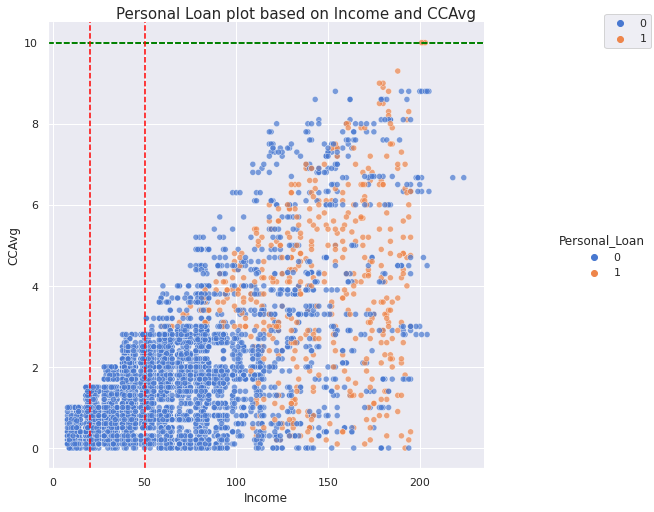

In [41]:
data_req=data[(data['Income']<225) & (data['CCAvg']<11)]
#data_req=data[(data['Income_log']<225) & (data['CCAvg_log']<11)]

g2=sns.relplot(x="Income", y="CCAvg", hue="Personal_Loan",
            alpha=.7, palette="muted",
            height=7, data=data_req, legend="full");

g2.fig.suptitle("Personal Loan plot based on Income and CCAvg", y=1.01, fontsize=15); 


g2.fig.legend(loc='upper left', bbox_to_anchor=(1,1));

g2.map(plt.axhline, y=10, ls='--', c='green');

g2.map(plt.axhline, y=10, ls='--', c='green');

g2.map(plt.axhline, y=10, ls='--', c='green');

# g2.map(plt.axhline, y=3500, ls='--', c='red');

g2.map(plt.axvline, x=20, ls='--', c='red');

g2.map(plt.axvline, x=50, ls='--', c='red');

- Data in this plot indicates that data doesn't fit in linear boundaries. This may be indicator that Decision Tree may be good model.

## **Common Functions**
* The model_performance_classification_sklearn_with_threshold function will be used to check the model performance of models. 
* The confusion_matrix_sklearn_with_threshold function will be used to plot confusion matrix.

In [42]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn

def model_performance_classification_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    Function to compute different metrics, based on the threshold specified, to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # predicting using the independent variables
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    pred = np.round(pred_thres)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [43]:
# defining a function to plot the confusion_matrix of a classification model built using sklearn
def confusion_matrix_sklearn_with_threshold(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix, based on the threshold specified, with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    pred_prob = model.predict_proba(predictors)[:, 1]
    pred_thres = pred_prob > threshold
    y_pred = np.round(pred_thres)

    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## **Model Building - Using Original Columns(no log transformation)**

In [44]:
# ID column is not required for analysis. These columns doesn't influence target variable - Personal_Loan.
data.drop(['Income_log'],axis=1,inplace=True) 
data.drop(['CCAvg_log'],axis=1,inplace=True) 
# Checking 10 random values from data set
np.random.seed(1)
data.sample(n=10)

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
2764,31,5,84,91320,1,2.9,3,105,0,0,0,0,1
4767,35,9,45,90639,3,0.9,1,101,0,1,0,0,0
3814,34,9,35,94304,3,1.3,1,0,0,0,0,0,0
3499,49,23,114,94550,1,0.3,1,286,0,0,0,1,0
2735,36,12,70,92131,3,2.6,2,165,0,0,0,1,0
3922,31,4,20,95616,4,1.5,2,0,0,0,0,1,0
2701,50,26,55,94305,1,1.6,2,0,0,0,0,1,0
1179,36,11,98,90291,3,1.2,3,0,0,1,0,0,1
932,51,27,112,94720,3,1.8,2,0,0,1,1,1,1
792,41,16,98,93117,1,4.0,3,0,0,0,0,0,1


#### Creating Train and Test Split

In [45]:
data_logtransformed = data.copy() # Maintaining copy before deleting target variable
X = data.drop(['Personal_Loan'], axis=1)
Y = data['Personal_Loan']

X = pd.get_dummies(X,drop_first=True)

#Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,Y, stratify=Y, test_size=0.30, random_state = 1)

### **Model Building - Logistic Regression**

* Build Logistic Regression Model

In [46]:
#liblinear and newton-cg
logReg_model = LogisticRegression(solver="newton-cg", random_state=1)
model = logReg_model.fit(X_train, y_train)

#### Checking performance on training set

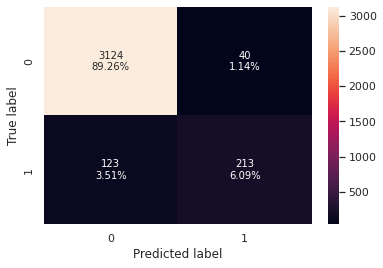

In [47]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(logReg_model, X_train, y_train)

* TP - 213 (6.09%) - Prediction is inline with Truth for positive value(customer opted for Personal Loan)
* FP - 40 (1.14%) - - Prediction is different from Truth for positive value(customer did not opted for Personal Loan)
* TN - 3124 (89.26%)- Prediction is inline with Truth for negative value(customer did not opted for Personal Loan as predicated)
* FN - 123 (3.51%)- Prediction is different from Truth for negative value(customer opted for Personal Loan and predicated not to take personal loan )

In [48]:
# Checking performance of model on Training Set
log_reg_model_train_perf = model_performance_classification_sklearn_with_threshold(
    logReg_model, X_train, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.953429,0.633929,0.841897,0.72326


#### Checking performance on test set

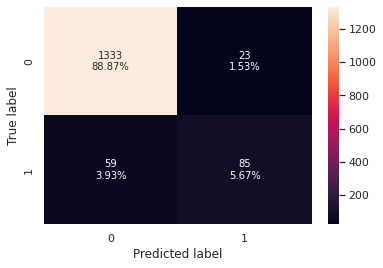

In [49]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(logReg_model, X_test, y_test)

In [50]:
# Checking performance of model on Test Set
log_reg_model_test_perf = model_performance_classification_sklearn_with_threshold(
    logReg_model, X_test, y_test
)

print("Test set performance:")
log_reg_model_test_perf

Test set performance:


,Accuracy,Recall,Precision,F1
0,0.945333,0.590278,0.787037,0.674603


#### Insights:

- **True Positives:**
    - Reality:  The customer opted for Personal Loan.
    - Model predicted: The customer will opt for Personal Loan.
    - Outcome: The model is good.

- **True Negatives:**
    - Reality: The customer did not opted for Personal Loan.
    - Model predicted: The customer will NOT opt for Personal Loan.
    - Outcome: The business is unaffected.

- **False Positives:**
    - Reality: A customer did NOT opt for Personal Loan.
    - Model predicted: The customer will opt for Personal Loan.
    - Outcome: The team which is targeting the potential customers may be tergetting wrong audience. This may impact spending time with no positive result for company.

- **False Negatives:**
    - Reality: A customer opted for Personal Loan.
    - Model predicted: The customer will NOT opt for Personal Loan.
    - Outcome: The potential customer is missed by the sales/marketing team to offer personal loan. This may cause revenue impact. 

* Logistic regression model is producing low Recall. 
* There ar emany true negatives indicating imbalnace in data from true positives. 

#### Model Tunning - Logistic Regression 

##### ROC-AUC

* The area under the ROC curve (AUC) is a measure of how good a model is - The higher the AUC, the better the model is, at distinguishing between classes.


* ROC-AUC on training set

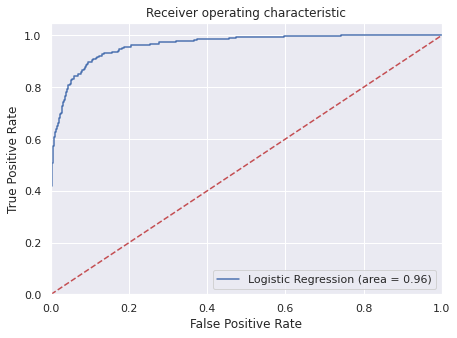

In [59]:
# Find the roc auc score for training data
logit_roc_auc_train = roc_auc_score(
    y_train, logReg_model.predict_proba(X_train)[:, 1]
)  # The indexing represents predicted probabilities for class 1
# Find fpr, tpr and threshold values
fpr, tpr, thresholds = roc_curve(y_train, logReg_model.predict_proba(X_train)[:, 1])
plt.figure(figsize=(7, 5))
# Plot roc curve
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

* ROC-AUC on test set

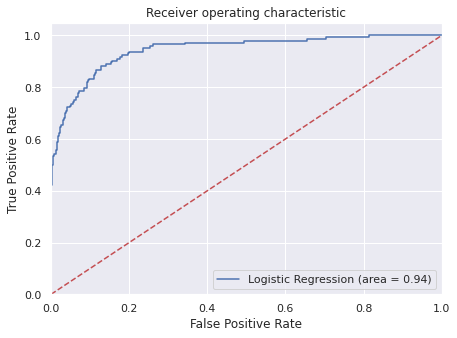

In [60]:
# Find the roc auc score for training data
logit_roc_auc_test = roc_auc_score(
    y_test, logReg_model.predict_proba(X_test)[:, 1]
)  # The indexing represents predicted probabilities for class 1
# Find fpr, tpr and threshold values
fpr, tpr, thresholds = roc_curve(y_test, logReg_model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(7, 5))
# Plot roc curve
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_test)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

* Model is giving a generalized performance.

###### Model Performance Improvement

* Check if f1 score can be improved further, by changing the model threshold using AUC-ROC Curve.

###### Optimal threshold using AUC-ROC curve

Optimal thresold is the value that best separated the True positive rate and False positive rate. 

In [61]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
# roc_curve returns the fpr, tpr and threshold values which takes the original data and predicted probabilities for the class 1.
fpr, tpr, thresholds = roc_curve(
    y_train, logReg_model.predict_proba(X_train)[:, 1]
)  # The indexing represents predicted probabilities for class 1

optimal_idx = np.argmax(
    tpr - fpr
)  # Finds the index that contains the max difference between tpr and fpr
optimal_threshold_auc_roc = thresholds[
    optimal_idx
]  # stores the optimal threshold value
print(optimal_threshold_auc_roc)

0.09336706220372193


###### Checking model performance on training set

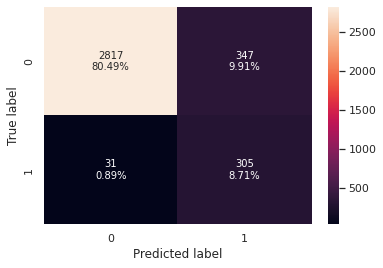

In [62]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    logReg_model, X_train, y_train, threshold=optimal_threshold_auc_roc
)

In [63]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(
    logReg_model, X_train, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.892,0.907738,0.467791,0.617409


* The precision of the model has reduced. Recall has increased.

###### Checking model performance on test set

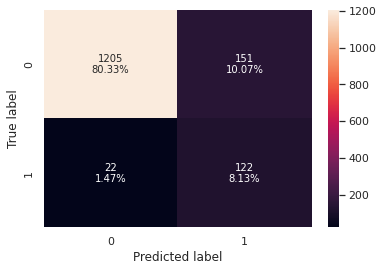

In [64]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    logReg_model, X_test, y_test, threshold=optimal_threshold_auc_roc
)

In [65]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_sklearn_with_threshold(
    logReg_model, X_test, y_test, threshold=optimal_threshold_auc_roc
)
print("Test set performance:")
log_reg_model_test_perf_threshold_auc_roc

Test set performance:


,Accuracy,Recall,Precision,F1
0,0.884667,0.847222,0.446886,0.585132


##### Precision Recall Curve
The Precision-Recall curve shows the tradeoff between Precision and Recall for different thresholds. It can be used to select optimal threshold as required to improve the model improvement. 

#### precision_recall_curve()

Returns the fpr, tpr and threshold values

**Input:** 
        1. Original data
        2. Predicted Probability
        
**Output:** False positive rate, true positive rate and threshold values

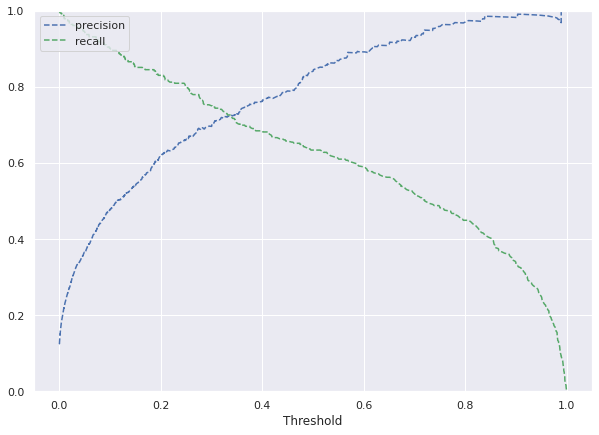

In [53]:
# Find the predicted probabilities for class 1
y_scores = logReg_model.predict_proba(X_train)[:, 1]
# Find fpr, tpr and threshold values
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
# Plot recall precision curve
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

* At the threshold of 0.36, we get balanced recall and precision.

In [54]:
# setting the threshold
optimal_threshold_curve = 0.36

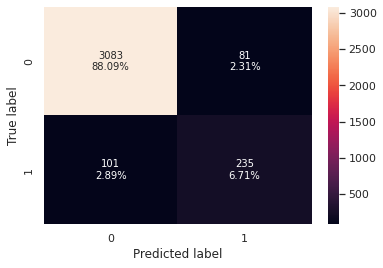

In [55]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    logReg_model, X_train, y_train, threshold=optimal_threshold_curve
)

In [56]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_sklearn_with_threshold(
    logReg_model, X_train, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.948,0.699405,0.743671,0.720859


###### Checking model performance on test set

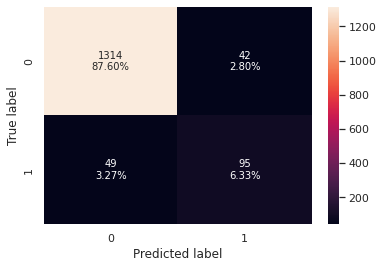

In [57]:
# creating confusion matrix
confusion_matrix_sklearn_with_threshold(
    logReg_model, X_test, y_test, threshold=optimal_threshold_curve
)

In [58]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_sklearn_with_threshold(
    logReg_model, X_test, y_test, threshold=optimal_threshold_curve
)
print("Test set performance:")
log_reg_model_test_perf_threshold_curve

Test set performance:


,Accuracy,Recall,Precision,F1
0,0.939333,0.659722,0.693431,0.676157


* Model is performing well on training and test.
* There's not much improvement in the model performance as the default threshold is 0.50 and here we get 0.58 as the optimal threshold.

#### Model Performance Summary

In [70]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "LG_sklearn",
    "LG-.09 Threshold",
    "LG-0.36 Threshold",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,LG_sklearn,LG-.09 Threshold,LG-0.36 Threshold
Accuracy,0.953429,0.892000,0.948000
Recall,0.633929,0.907738,0.699405
Precision,0.841897,0.467791,0.743671
F1,0.723260,0.617409,0.720859


In [71]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "LG_sklearn",
    "LG-.09 Threshold",
    "LG-0.36 Threshold",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,LG_sklearn,LG-.09 Threshold,LG-0.36 Threshold
Accuracy,0.945333,0.884667,0.939333
Recall,0.590278,0.847222,0.659722
Precision,0.787037,0.446886,0.693431
F1,0.674603,0.585132,0.676157


* Model is performing well on training and test with auc_roc curve.


###  **Model building - Decision Tree**
* Model Building - Approach
1. Data preparation
2. Partition the data into train and test set.
3. Built a CART model on the train data.
4. Tune the model and prune the tree, if required.

In [72]:
from sklearn.tree import plot_tree

####  **Initial - Decision Tree**

In [73]:
model_gini=DecisionTreeClassifier(criterion='gini', random_state=1)

model_entropy=DecisionTreeClassifier(criterion='entropy', random_state=1)

In [74]:
model_gini.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [75]:
model_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=1)

##### Checking model performance on training set

In [76]:
# Checking performance of model on Train Set
decision_tree_perf_train = model_performance_classification_sklearn_with_threshold(
    model_gini, X_train, y_train
)

print("Train set performance for base Decision Tree:")
decision_tree_perf_train

Train set performance for base Decision Tree:


,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


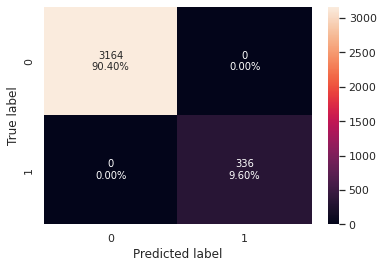

In [77]:
confusion_matrix_sklearn_with_threshold(model_gini, X_train, y_train)

##### Checking model performance on test set

In [78]:
# Checking performance of model on Train Set
decision_tree_perf_test = model_performance_classification_sklearn_with_threshold(
    model_gini, X_test, y_test
)

print("Test set performance for base Decision Tree:")
decision_tree_perf_test

Test set performance for base Decision Tree:


,Accuracy,Recall,Precision,F1
0,0.977333,0.854167,0.904412,0.878571


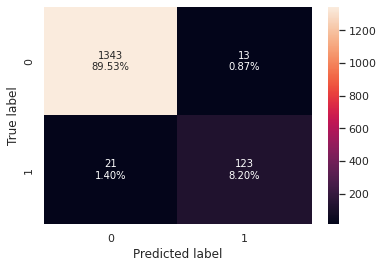

In [79]:
confusion_matrix_sklearn_with_threshold(model_gini, X_test, y_test)

#####  <span style="font-family: Calibri; font-size:1.3em;color:#000055"> Plotting a Decision Tree</span>

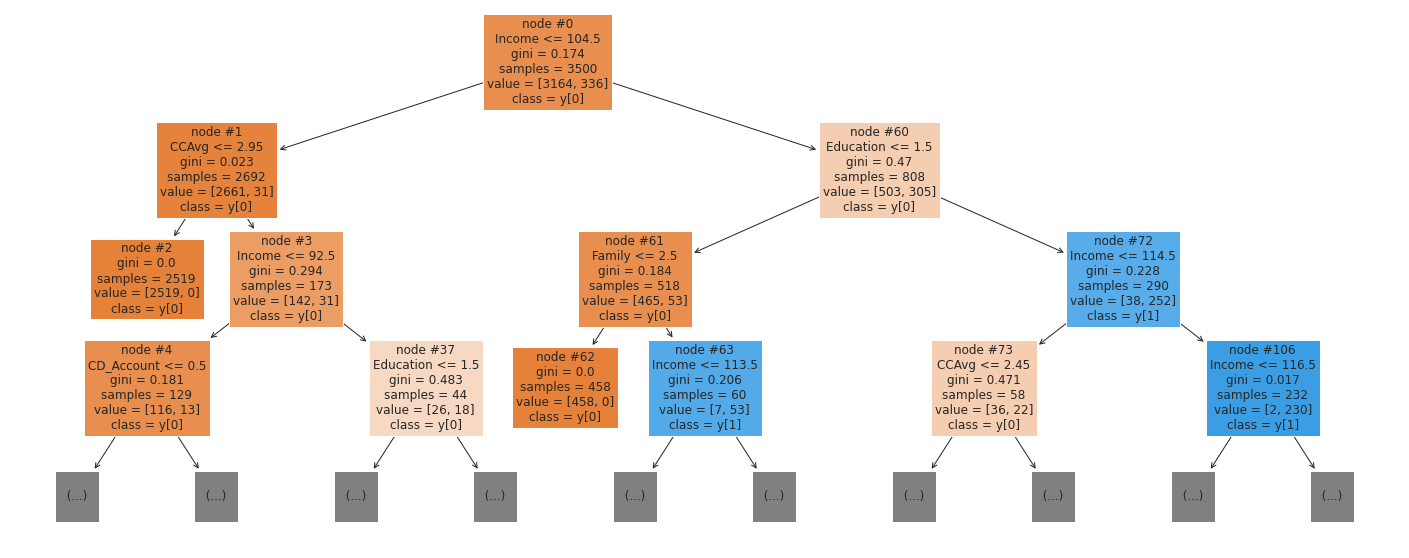

In [80]:
features = list(X.columns)

plt.figure(figsize=(25,10))
plot_tree(model_gini, max_depth=3, feature_names=features,filled=True,fontsize=12,node_ids=True,class_names=True)
plt.show()

In [81]:
print("Depth of DT using Gini")
model_gini.get_depth()

Depth of DT using Gini


12

In [82]:
#Training a decision tree model with default parameters and vary the depth from 1 to 12 (both values included) and compare the model performance at each value of depth
score_DT = []
for i in range(1,12):
  dTree = DecisionTreeClassifier(max_depth=i,criterion = 'gini', random_state=1)
  dTree.fit(X_train, y_train)
  pred = dTree.predict(X_train)
  case = {'Depth':i,'Recall':recall_score(y_train,pred)}
  score_DT.append(case)
  print(score_DT)
# Conclusion - At depth = 10, the decision tree gives the highest recall among all the models on the training set.

[{'Depth': 1, 'Recall': 0.0}]
[{'Depth': 1, 'Recall': 0.0}, {'Depth': 2, 'Recall': 0.75}]
[{'Depth': 1, 'Recall': 0.0}, {'Depth': 2, 'Recall': 0.75}, {'Depth': 3, 'Recall': 0.8422619047619048}]
[{'Depth': 1, 'Recall': 0.0}, {'Depth': 2, 'Recall': 0.75}, {'Depth': 3, 'Recall': 0.8422619047619048}, {'Depth': 4, 'Recall': 0.9226190476190477}]
[{'Depth': 1, 'Recall': 0.0}, {'Depth': 2, 'Recall': 0.75}, {'Depth': 3, 'Recall': 0.8422619047619048}, {'Depth': 4, 'Recall': 0.9226190476190477}, {'Depth': 5, 'Recall': 0.9404761904761905}]
[{'Depth': 1, 'Recall': 0.0}, {'Depth': 2, 'Recall': 0.75}, {'Depth': 3, 'Recall': 0.8422619047619048}, {'Depth': 4, 'Recall': 0.9226190476190477}, {'Depth': 5, 'Recall': 0.9404761904761905}, {'Depth': 6, 'Recall': 0.9553571428571429}]
[{'Depth': 1, 'Recall': 0.0}, {'Depth': 2, 'Recall': 0.75}, {'Depth': 3, 'Recall': 0.8422619047619048}, {'Depth': 4, 'Recall': 0.9226190476190477}, {'Depth': 5, 'Recall': 0.9404761904761905}, {'Depth': 6, 'Recall': 0.9553571428571

#####  <span style="font-family: Calibri; font-size:1.3em;color:#000055"> Feature Importance</span>

In [83]:
## Calculating feature importance based on Gini Model

feat_importance = model_gini.tree_.compute_feature_importances(normalize=False)

feature_cols=features

feat_imp_dict = dict(zip(feature_cols, model_gini.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.rename(columns = {0:'FeatureImportance'}, inplace = True)

feat_imp.sort_values(by=['FeatureImportance'], ascending=False).head(20) #Top 10 features 

,FeatureImportance
Education,0.369012
Income,0.359000
Family,0.155584
CCAvg,0.051541
Experience,0.018691
ZIPCode,0.015191
Age,0.010237
Mortgage,0.010073
CD_Account,0.005728
Online,0.004942


In [84]:
feat_imp.sum()

FeatureImportance    1.0
dtype: float64

####  <span style="font-family: Calibri; font-size:1.3em;color:#000055"> Model Tunning - Decision Tree with Grid Search CV</span>

In [85]:
from sklearn.model_selection import GridSearchCV

In [86]:
# Choose the type of classifier. 
estimator = DecisionTreeClassifier(random_state=1) #defeault model

#--------------------96 DT Models---------------

# Grid of parameters to choose from (hyper parameters)
parameters = {
            'max_depth': np.arange(1,12), #5,6,7,8, 9, 10 - 6 combination
            'class_weight': ['balanced', 'None'],    #- 2 combinations
            'criterion': ['entropy','gini'], # - 2 combinations
                'min_impurity_decrease': [0.000001,0.00001,0.0001, 0.001], #-4 combinations
#             'max_features': ['log2','sqrt'] #default - all independent variables are used
             }

#log2 - maxfeatures = log2(Toal features in the data) E.g. Total feature=8 log2(8) = 3, randomly pick 3 features to build the 
#tree. Squre root - sqrt(Total features), e.g. TF-16, 4 randomly selected features to build my tree.

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=scorer,cv=3) #---cross validation
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=3, min_impurity_decrease=1e-06,
                       random_state=1)

##### Checking model performance on test set

In [87]:
# Checking performance of model on Test Set
decision_tree_tune_perf_test = model_performance_classification_sklearn_with_threshold(
    estimator, X_test, y_test
)

print("Test set performance for Tuned Decision Tree:")
decision_tree_tune_perf_test

Test set performance for Tuned Decision Tree:


,Accuracy,Recall,Precision,F1
0,0.936667,0.944444,0.609865,0.741144


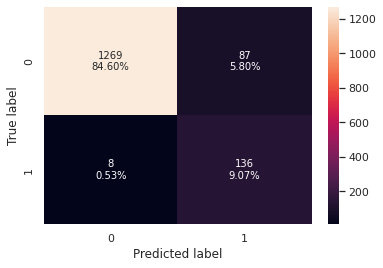

In [88]:
confusion_matrix_sklearn_with_threshold(estimator, X_test, y_test)

##### Checking model performance on training set

In [89]:
# Checking performance of model on Training Set
decision_tree_tune_perf_train = model_performance_classification_sklearn_with_threshold(
    estimator, X_train, y_train
)

print("Train set performance for Tuned Decision Tree:")
decision_tree_tune_perf_train

Train set performance for Tuned Decision Tree:


,Accuracy,Recall,Precision,F1
0,0.949143,0.982143,0.657371,0.787589


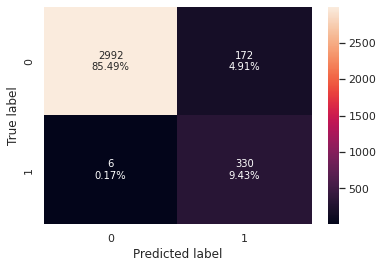

In [90]:
confusion_matrix_sklearn_with_threshold(estimator, X_train, y_train)

In [91]:
## Calculating feature importance

feat_importance = estimator.tree_.compute_feature_importances(normalize=False)


feat_imp_dict = dict(zip(feature_cols, estimator.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.rename(columns = {0:'FeatureImportance'}, inplace = True)

feat_imp.sort_values(by=['FeatureImportance'], ascending=False).head(15) #Top 10 features 

,FeatureImportance
Income,0.633128
Family,0.143911
Education,0.135593
CCAvg,0.087369
Age,0.000000
Experience,0.000000
ZIPCode,0.000000
Mortgage,0.000000
Securities_Account,0.000000
CD_Account,0.000000


In [92]:
feat_imp_req=feat_imp[feat_imp['FeatureImportance']>0]
feat_imp_req.head(10)

,FeatureImportance
Income,0.633128
Family,0.143911
CCAvg,0.087369
Education,0.135593


#####  <span style="font-family: Calibri; font-size:1.3em;color:#000055"> Explainable AI with SHAP </span>

In [93]:
 !pip install shap

In [94]:
import shap #LIME

In [95]:
explainer = shap.TreeExplainer(estimator)
shap_values = explainer.shap_values(X_train)
shap_values[1] #0, 1 indices are Personal Loan = 0 / 1

array([[ 0.        ,  0.        , -0.5040077 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        , -0.52967194, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        , -0.5040077 , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        , -0.0261888 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.21027225, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        , -0.52967194, ...,  0.        ,
         0.        ,  0.        ]])

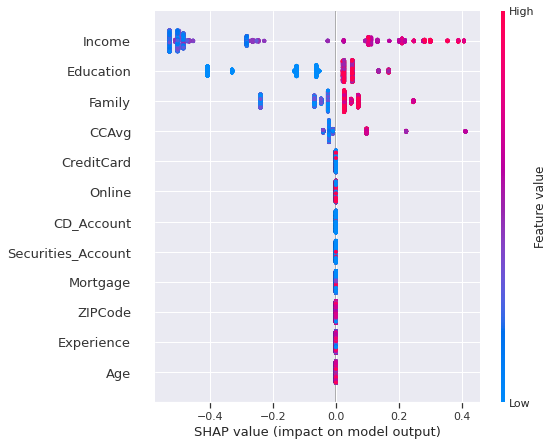

In [96]:
# Make plot. Index of [1] is explained in text below.
shap.summary_plot(shap_values[1], X_train)

This plot is made of all the dots in the train data. It delivers the following information:

1. Feature importance: Variables are ranked in descending order.
2. Impact: The horizontal location shows whether the effect of that value is associated with a higher or lower prediction.
3. Original value: Color shows whether that variable is high (in red) or low (in blue) for that observation.
4. Correlation: A high level of Income in general has positive impact on revenue

#### Cost Complexity Pruning

In [97]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [ ]:
pd.DataFrame(path)

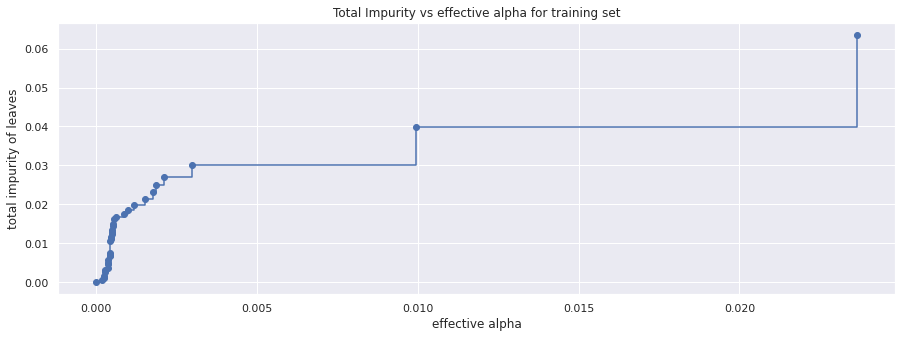

In [99]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [100]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.05500087826368064


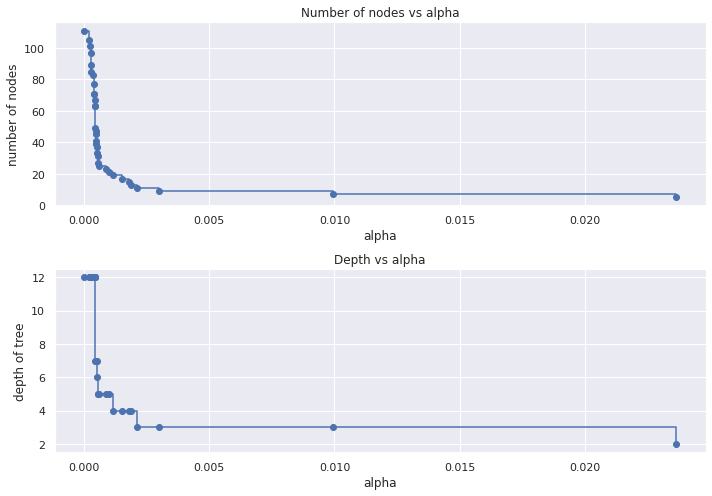

In [101]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

##### Recall vs alpha for training and testing sets


In [102]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

In [103]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

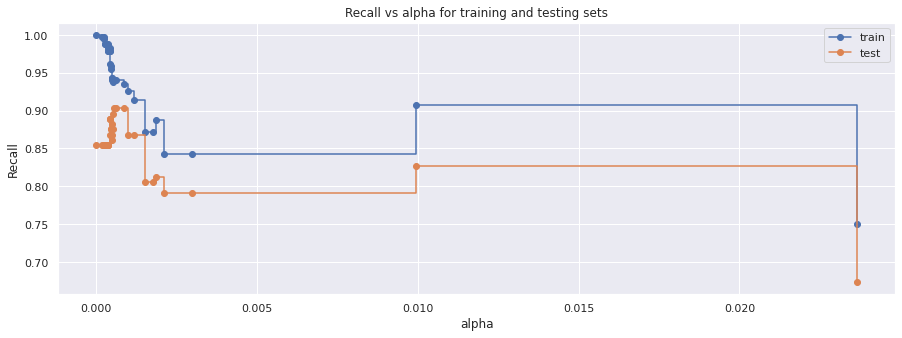

In [104]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [105]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0005665024630541863, random_state=1)


##### Checking model performance on training set

In [106]:
decision_tree_postpruned_perf_train = model_performance_classification_sklearn_with_threshold(
    best_model, X_train, y_train
)
decision_tree_postpruned_perf_train

,Accuracy,Recall,Precision,F1
0,0.989714,0.940476,0.951807,0.946108


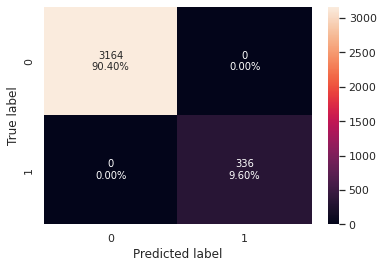

In [107]:
confusion_matrix_sklearn_with_threshold(model_gini, X_train, y_train)

##### Checking model performance on test set

In [108]:
# Checking performance of model on Test Set
decision_tree_postpruned_perf_test = model_performance_classification_sklearn_with_threshold(
    best_model, X_test, y_test
)

print("Test set performance:")
decision_tree_postpruned_perf_test

Test set performance:


,Accuracy,Recall,Precision,F1
0,0.984,0.902778,0.928571,0.915493


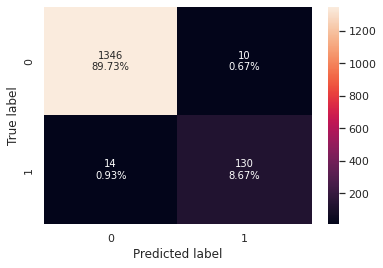

In [109]:
confusion_matrix_sklearn_with_threshold(best_model, X_test, y_test)

In [110]:
# Checking performance of model on Test Set
postprunned_model_test_perf = model_performance_classification_sklearn_with_threshold(
    model_gini, X_test, y_test
)

print("Test set performance:")
postprunned_model_test_perf

Test set performance:


,Accuracy,Recall,Precision,F1
0,0.977333,0.854167,0.904412,0.878571


DecisionTreeClassifier(ccp_alpha=0.0005665024630541863, random_state=0)


### **Comparing all the decision tree models**

In [111]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_postpruned_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,1.0,0.949143,0.989714
Recall,1.0,0.982143,0.940476
Precision,1.0,0.657371,0.951807
F1,1.0,0.787589,0.946108


In [113]:
# test performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_postpruned_perf_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.977333,0.936667,0.984000
Recall,0.854167,0.944444,0.902778
Precision,0.904412,0.609865,0.928571
F1,0.878571,0.741144,0.915493


* Decision tree pre-prunned is giving the highest recall on the test set.


## Business Insights
* We have Imbalance training data in data set. (More data where individuals has not opted for Personal Loan - 90%). We can provide better recommednations with fair weighted training data where we have more data for individuals opted for personal loan.  
* Decision Tree provides better modelling for this problem compared to Logistic Regression.
* Income, family and CCAvg  are the most important variables in determining if individual will opt for personal Loan.
* Higher Income group can be targetted to buy a personal loan.
* Individuals with higher Average spending on credit cards per month can be targetted to buy loan. Based on data there are good chances that these individuals will buy Personal Loan to pay off credit card debt.
